In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

��Ŀ¼���ļ� -p �Ѿ����ڡ�
����: -p ʱ������
��Ŀ¼���ļ� input �Ѿ����ڡ�
����: input ʱ������
��Ŀ¼���ļ� -p �Ѿ����ڡ�
����: -p ʱ������
��Ŀ¼���ļ� outputs �Ѿ����ڡ�
����: outputs ʱ������


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:06, 17.55it/s]                         


Epoch 1 of 100
Generator loss: -3.06424069, Discriminator loss: 0.45906368


118it [00:06, 18.20it/s]                         


Epoch 2 of 100
Generator loss: -4.41151428, Discriminator loss: 1.06838799


118it [00:06, 17.52it/s]                         


Epoch 3 of 100
Generator loss: -5.10499382, Discriminator loss: 2.05993581


118it [00:06, 17.25it/s]                         


Epoch 4 of 100
Generator loss: -4.43186283, Discriminator loss: 1.09190798


118it [00:06, 17.05it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


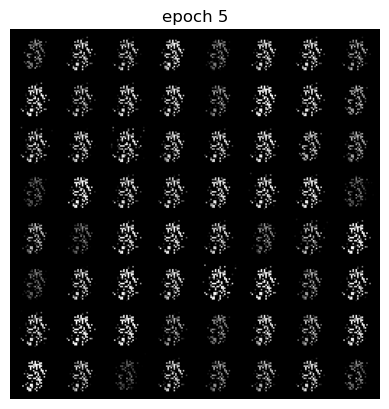

Epoch 5 of 100
Generator loss: -3.48737216, Discriminator loss: 0.97367430


118it [00:06, 17.50it/s]                         


Epoch 6 of 100
Generator loss: -2.54313469, Discriminator loss: 0.13937815


118it [00:06, 17.59it/s]                         


Epoch 7 of 100
Generator loss: -5.53888083, Discriminator loss: 2.10474730


118it [00:06, 17.46it/s]                         


Epoch 8 of 100
Generator loss: -4.93392897, Discriminator loss: 1.61344361


118it [00:06, 17.36it/s]                         


Epoch 9 of 100
Generator loss: -5.44202375, Discriminator loss: 1.62176073


118it [00:07, 16.85it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


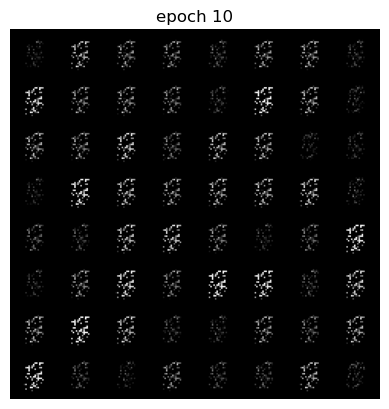

Epoch 10 of 100
Generator loss: -5.52561951, Discriminator loss: 1.78775477


118it [00:07, 15.81it/s]                         


Epoch 11 of 100
Generator loss: -6.11248970, Discriminator loss: 2.42115355


118it [00:07, 15.23it/s]                         


Epoch 12 of 100
Generator loss: -5.22204208, Discriminator loss: 1.60967696


118it [00:07, 15.03it/s]                         


Epoch 13 of 100
Generator loss: -3.95428133, Discriminator loss: 1.04176188


118it [00:07, 15.61it/s]                         


Epoch 14 of 100
Generator loss: -4.07111502, Discriminator loss: 0.82311583


118it [00:07, 15.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


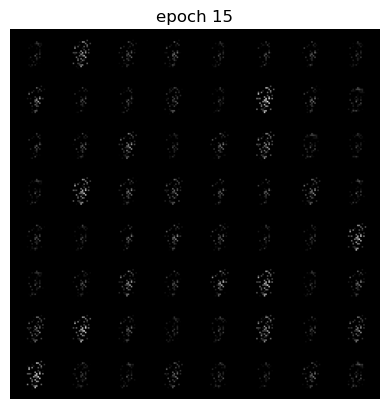

Epoch 15 of 100
Generator loss: -4.76888323, Discriminator loss: 1.19517541


118it [00:07, 15.56it/s]                         


Epoch 16 of 100
Generator loss: -4.03377151, Discriminator loss: 1.05519819


118it [00:07, 15.12it/s]                         


Epoch 17 of 100
Generator loss: -3.69559383, Discriminator loss: 0.50917906


118it [00:07, 15.16it/s]                         


Epoch 18 of 100
Generator loss: -4.42409277, Discriminator loss: 1.10720921


118it [00:07, 15.85it/s]                         


Epoch 19 of 100
Generator loss: -4.18993950, Discriminator loss: 0.60049355


118it [00:07, 15.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


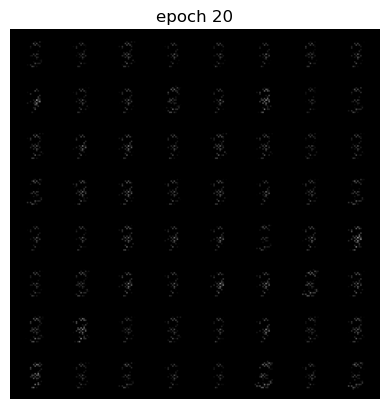

Epoch 20 of 100
Generator loss: -5.08672237, Discriminator loss: 1.54011464


118it [00:07, 15.38it/s]                         


Epoch 21 of 100
Generator loss: -3.04379892, Discriminator loss: 0.47977340


118it [00:07, 15.14it/s]                         


Epoch 22 of 100
Generator loss: -4.27248383, Discriminator loss: 0.85996062


118it [00:07, 15.92it/s]                         


Epoch 23 of 100
Generator loss: -3.66315103, Discriminator loss: 0.50339323


118it [00:07, 16.22it/s]                         


Epoch 24 of 100
Generator loss: -3.71314955, Discriminator loss: 0.95870155


118it [00:07, 15.96it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


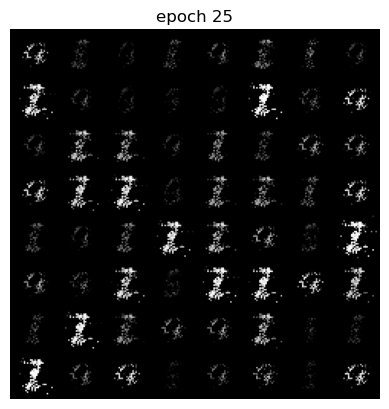

Epoch 25 of 100
Generator loss: -4.71788979, Discriminator loss: 1.55485678


118it [00:07, 15.67it/s]                         


Epoch 26 of 100
Generator loss: -4.53435087, Discriminator loss: 0.99358410


118it [00:07, 16.15it/s]                         


Epoch 27 of 100
Generator loss: -3.19349194, Discriminator loss: 0.44104710


118it [00:07, 16.02it/s]                         


Epoch 28 of 100
Generator loss: -3.41759443, Discriminator loss: 0.39534110


118it [00:07, 16.17it/s]                         


Epoch 29 of 100
Generator loss: -3.60012436, Discriminator loss: 0.57253760


118it [00:07, 15.54it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


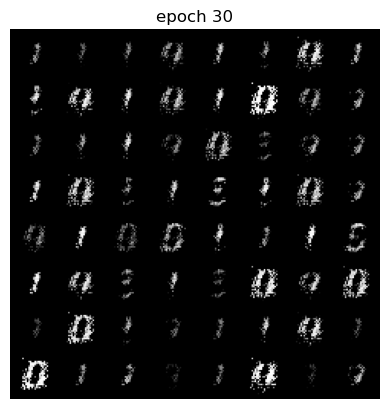

Epoch 30 of 100
Generator loss: -3.87970257, Discriminator loss: 0.85944104


118it [00:07, 15.73it/s]                         


Epoch 31 of 100
Generator loss: -3.60109043, Discriminator loss: 0.52695543


118it [00:07, 15.41it/s]                         


Epoch 32 of 100
Generator loss: -3.69727468, Discriminator loss: 0.40835083


118it [00:07, 15.34it/s]                         


Epoch 33 of 100
Generator loss: -3.83425808, Discriminator loss: 0.60617089


118it [00:07, 15.16it/s]                         


Epoch 34 of 100
Generator loss: -3.94574142, Discriminator loss: 0.74056351


118it [00:07, 15.55it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


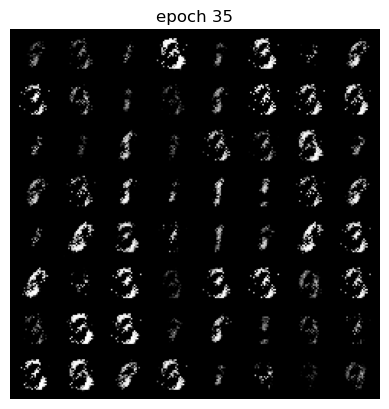

Epoch 35 of 100
Generator loss: -3.35947943, Discriminator loss: 0.55200088


118it [00:07, 15.44it/s]                         


Epoch 36 of 100
Generator loss: -3.75370026, Discriminator loss: 0.68284065


118it [00:07, 15.87it/s]                         


Epoch 37 of 100
Generator loss: -3.97550702, Discriminator loss: 0.61014283


118it [00:07, 15.98it/s]                         


Epoch 38 of 100
Generator loss: -3.71160316, Discriminator loss: 0.85101408


118it [00:07, 15.82it/s]                         


Epoch 39 of 100
Generator loss: -3.76919270, Discriminator loss: 0.58780158


118it [00:07, 15.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


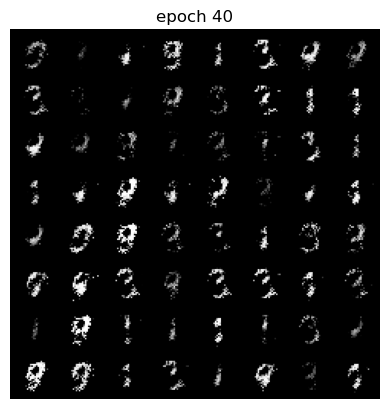

Epoch 40 of 100
Generator loss: -3.89972734, Discriminator loss: 0.51415288


118it [00:07, 15.72it/s]                         


Epoch 41 of 100
Generator loss: -3.69749451, Discriminator loss: 0.67855030


118it [00:07, 15.57it/s]                         


Epoch 42 of 100
Generator loss: -3.99449968, Discriminator loss: 0.80325449


118it [00:07, 15.92it/s]                         


Epoch 43 of 100
Generator loss: -4.40501642, Discriminator loss: 0.96632403


118it [00:07, 16.08it/s]                         


Epoch 44 of 100
Generator loss: -4.06362247, Discriminator loss: 0.51642442


118it [00:07, 15.75it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


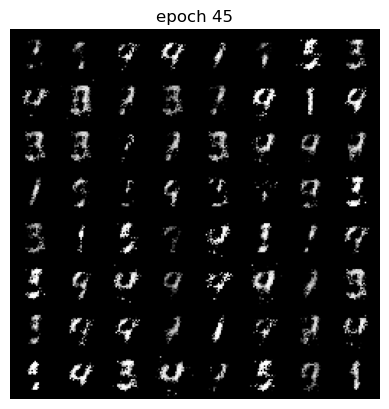

Epoch 45 of 100
Generator loss: -3.64313936, Discriminator loss: 0.48296469


118it [00:07, 15.56it/s]                         


Epoch 46 of 100
Generator loss: -3.63779783, Discriminator loss: 0.46225294


118it [00:07, 16.56it/s]                         


Epoch 47 of 100
Generator loss: -3.77286744, Discriminator loss: 0.53261590


118it [00:07, 15.96it/s]                         


Epoch 48 of 100
Generator loss: -3.96711135, Discriminator loss: 1.10789490


118it [00:07, 15.96it/s]                         


Epoch 49 of 100
Generator loss: -4.38060570, Discriminator loss: 1.19312143


118it [00:07, 16.09it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


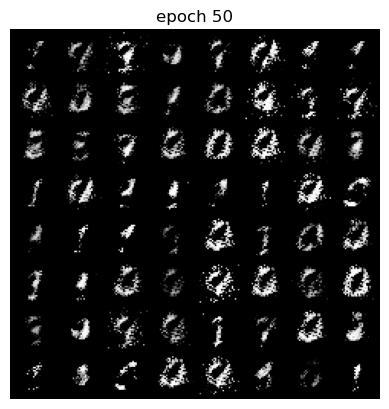

Epoch 50 of 100
Generator loss: -4.42019558, Discriminator loss: 0.91136557


118it [00:07, 15.25it/s]                         


Epoch 51 of 100
Generator loss: -4.34316778, Discriminator loss: 0.72898841


118it [00:06, 17.14it/s]                         


Epoch 52 of 100
Generator loss: -3.88129091, Discriminator loss: 0.85351849


118it [00:06, 17.50it/s]                         


Epoch 53 of 100
Generator loss: -4.21147633, Discriminator loss: 0.66971117


118it [00:06, 17.25it/s]                         


Epoch 54 of 100
Generator loss: -4.39754963, Discriminator loss: 0.96008581


118it [00:06, 17.89it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


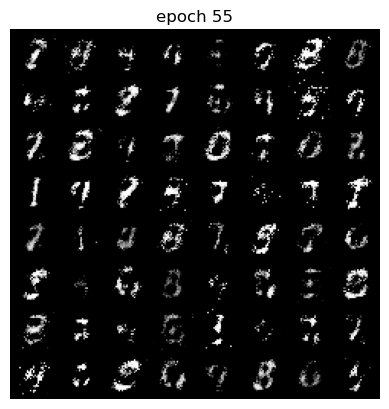

Epoch 55 of 100
Generator loss: -3.71701002, Discriminator loss: 0.60839123


118it [00:06, 18.07it/s]                         


Epoch 56 of 100
Generator loss: -3.99972343, Discriminator loss: 0.62386394


118it [00:06, 18.22it/s]                         


Epoch 57 of 100
Generator loss: -4.28684998, Discriminator loss: 0.72325420


118it [00:06, 17.87it/s]                         


Epoch 58 of 100
Generator loss: -4.20130682, Discriminator loss: 0.82190812


118it [00:07, 15.50it/s]                         


Epoch 59 of 100
Generator loss: -4.29985428, Discriminator loss: 0.99801034


118it [00:08, 14.41it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


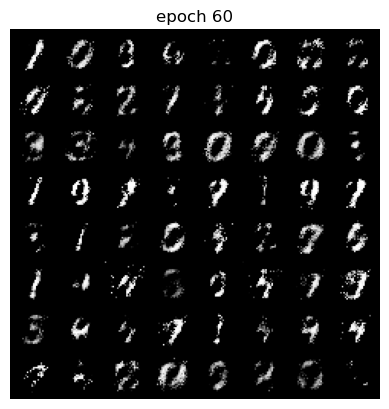

Epoch 60 of 100
Generator loss: -3.62563896, Discriminator loss: 0.60183561


118it [00:07, 16.41it/s]                         


Epoch 61 of 100
Generator loss: -4.21126938, Discriminator loss: 0.86467075


118it [00:07, 16.16it/s]                         


Epoch 62 of 100
Generator loss: -3.90234709, Discriminator loss: 0.68440843


118it [00:07, 15.57it/s]                         


Epoch 63 of 100
Generator loss: -4.15108585, Discriminator loss: 0.63509274


118it [00:07, 15.94it/s]                         


Epoch 64 of 100
Generator loss: -4.06682301, Discriminator loss: 0.72419870


118it [00:08, 14.63it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


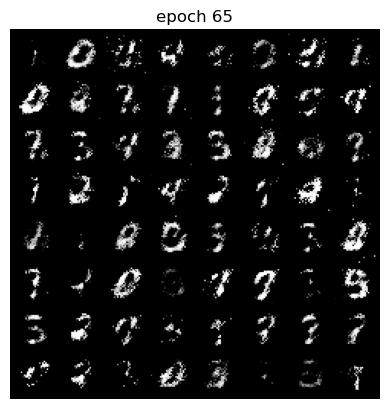

Epoch 65 of 100
Generator loss: -4.04800463, Discriminator loss: 0.52985060


118it [00:08, 14.38it/s]                         


Epoch 66 of 100
Generator loss: -4.49768543, Discriminator loss: 1.03273809


118it [00:08, 14.27it/s]                         


Epoch 67 of 100
Generator loss: -3.79543519, Discriminator loss: 0.89851153


118it [00:08, 14.55it/s]                         


Epoch 68 of 100
Generator loss: -4.23828125, Discriminator loss: 0.93012375


118it [00:08, 14.27it/s]                         


Epoch 69 of 100
Generator loss: -4.09239769, Discriminator loss: 0.64571345


118it [00:08, 14.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


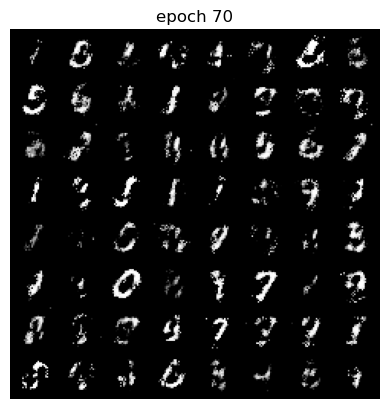

Epoch 70 of 100
Generator loss: -3.59464550, Discriminator loss: 0.45221448


118it [00:08, 14.43it/s]                         


Epoch 71 of 100
Generator loss: -4.02910614, Discriminator loss: 0.73639971


118it [00:08, 14.70it/s]                         


Epoch 72 of 100
Generator loss: -3.47350669, Discriminator loss: 0.60190123


118it [00:08, 14.43it/s]                         


Epoch 73 of 100
Generator loss: -4.25657177, Discriminator loss: 0.82348579


118it [00:08, 14.62it/s]                         


Epoch 74 of 100
Generator loss: -4.38829756, Discriminator loss: 1.06875813


118it [00:07, 16.03it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


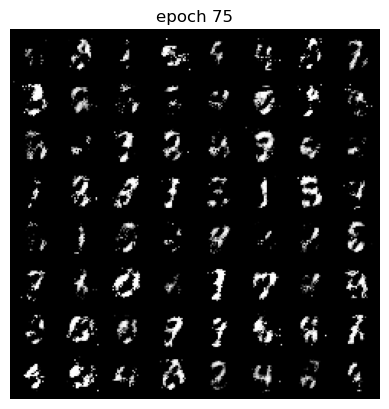

Epoch 75 of 100
Generator loss: -4.01842928, Discriminator loss: 0.77056271


118it [00:07, 15.33it/s]                         


Epoch 76 of 100
Generator loss: -4.00171947, Discriminator loss: 0.80970109


118it [00:07, 15.82it/s]                         


Epoch 77 of 100
Generator loss: -4.40838194, Discriminator loss: 0.80659616


118it [00:07, 14.98it/s]                         


Epoch 78 of 100
Generator loss: -4.46014833, Discriminator loss: 0.94535989


118it [00:07, 15.47it/s]                         


Epoch 79 of 100
Generator loss: -3.88835049, Discriminator loss: 0.89608037


118it [00:08, 14.73it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


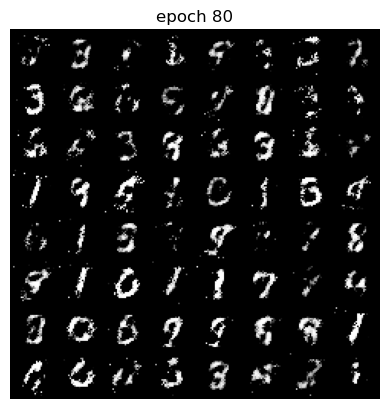

Epoch 80 of 100
Generator loss: -4.12400675, Discriminator loss: 0.93720406


118it [00:07, 15.45it/s]                         


Epoch 81 of 100
Generator loss: -4.16434097, Discriminator loss: 0.83742434


118it [00:07, 15.13it/s]                         


Epoch 82 of 100
Generator loss: -4.19113445, Discriminator loss: 0.84939063


118it [00:07, 15.40it/s]                         


Epoch 83 of 100
Generator loss: -4.59652376, Discriminator loss: 0.98486996


118it [00:07, 15.82it/s]                         


Epoch 84 of 100
Generator loss: -4.34729147, Discriminator loss: 0.86472273


118it [00:07, 15.58it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


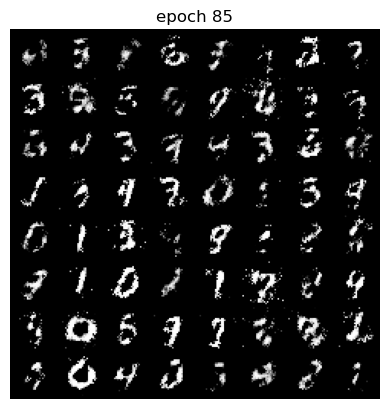

Epoch 85 of 100
Generator loss: -4.35790443, Discriminator loss: 0.68441534


118it [00:07, 15.71it/s]                         


Epoch 86 of 100
Generator loss: -4.43811655, Discriminator loss: 0.99152559


118it [00:07, 15.37it/s]                         


Epoch 87 of 100
Generator loss: -4.34294462, Discriminator loss: 0.82381713


118it [00:07, 14.93it/s]                         


Epoch 88 of 100
Generator loss: -4.43786144, Discriminator loss: 0.81722444


118it [00:07, 15.87it/s]                         


Epoch 89 of 100
Generator loss: -4.49560022, Discriminator loss: 1.10515618


118it [00:07, 15.20it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


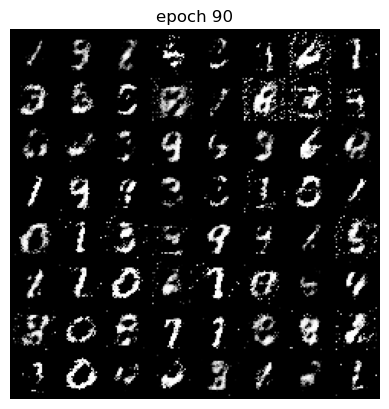

Epoch 90 of 100
Generator loss: -4.46700764, Discriminator loss: 0.92051828


118it [00:07, 15.43it/s]                         


Epoch 91 of 100
Generator loss: -3.91958237, Discriminator loss: 0.68031204


118it [00:07, 16.37it/s]                         


Epoch 92 of 100
Generator loss: -4.08664227, Discriminator loss: 0.86608672


118it [00:06, 17.39it/s]                         


Epoch 93 of 100
Generator loss: -4.46180248, Discriminator loss: 0.93260735


118it [00:06, 17.06it/s]                         


Epoch 94 of 100
Generator loss: -4.37596846, Discriminator loss: 0.85350978


118it [00:06, 17.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


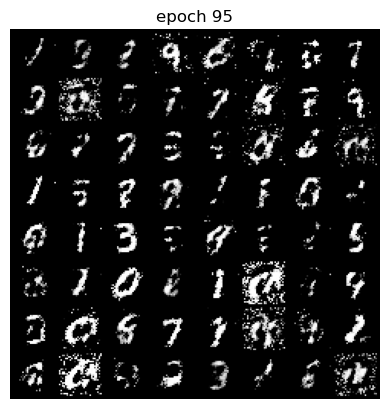

Epoch 95 of 100
Generator loss: -4.19915247, Discriminator loss: 0.88752985


118it [00:06, 17.74it/s]                         


Epoch 96 of 100
Generator loss: -4.44718504, Discriminator loss: 1.23412514


118it [00:06, 18.03it/s]                         


Epoch 97 of 100
Generator loss: -4.29612160, Discriminator loss: 0.91978055


118it [00:06, 17.80it/s]                         


Epoch 98 of 100
Generator loss: -4.84545326, Discriminator loss: 0.85501397


118it [00:06, 17.61it/s]                         


Epoch 99 of 100
Generator loss: -4.23281002, Discriminator loss: 1.06673717


118it [00:07, 15.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


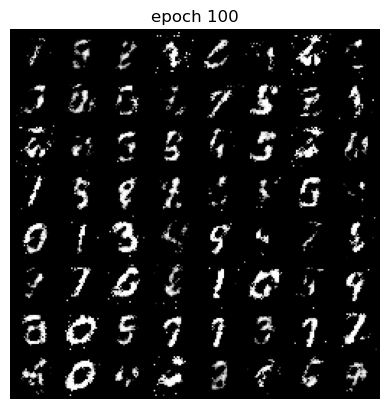

Epoch 100 of 100
Generator loss: -4.34120226, Discriminator loss: 0.70208621


In [14]:
torch.manual_seed(7777)

def generator_loss(fake_output, sample_size):
    ############ YOUR CODE HERE ##########
    loss_g = criterion(fake_output, label_real(sample_size))
    return loss_g
    ######################################

def generator_loss_2(fake_output, sample_size):
    ############ YOUR CODE HERE ##########
    fake_output = torch.log(fake_output)
    fake_output = fake_output / 100
    fake_output = torch.exp(fake_output)
    loss_g = - criterion(fake_output, label_fake(sample_size))
    return loss_g
    ######################################
    
def discriminator_loss(fake_output, fake_label, real_output, real_label):
    ############ YOUR CODE HERE ##########
    loss_d = criterion(fake_output, fake_label) + criterion(real_output, real_label)
    return loss_d
    ######################################

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        # get the data
        real, _ = data
        real = real.to(device)
    
        # train the discriminator
        for _ in range(k):
            # generate fake images
            fake = generator(create_noise(sample_size, nz))
            # get the loss for the discriminator
            loss_d = discriminator_loss(discriminator(fake), label_fake(sample_size), discriminator(real), label_real(real.size(0)))
            # optimize the discriminator
            optim_d.zero_grad()
            loss_d.backward()
            optim_d.step()
    
        # train the generator
        # generate fake images
        fake = generator(create_noise(sample_size, nz))
        # get the loss for the generator
        loss_g = generator_loss_2(discriminator(fake), sample_size)
        # optimize the generator
        optim_g.zero_grad()
        loss_g.backward()
        optim_g.step()
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g # total generator loss for the epoch
    epoch_loss_d = loss_d # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

In [17]:
for i in range(len(losses_g)):
    losses_g[i] = - np.array(losses_g[i].cpu().detach().numpy())
    
for i in range(len(losses_d)):
    losses_d[i] = np.array(losses_d[i].cpu().detach().numpy())

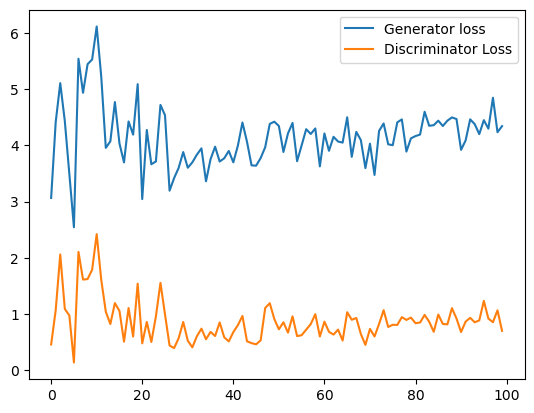

In [18]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')